# Proyecto de Machine Learning
Este notebook contiene el código para un proyecto de Machine Learning que utiliza un dataset de salud para predecir accidentes cerebrovasculares.

## Importación de Librerías



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Carga de Datos e Inspección

En esta sección, cargaremos el dataset y realizaremos una inspección inicial para entender mejor su estructura y contenido.

El dataset utilizado en este proyecto fue obtenido de Kaggle y se puede encontrar en el siguiente enlace: [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data).

### Descripción del Dataset

El dataset contiene información sobre pacientes y se utiliza para predecir la probabilidad de que un paciente sufra un accidente cerebrovascular. Los accidentes cerebrovasculares son una de las principales causas de muerte y discapacidad en todo el mundo. Este dataset incluye las siguientes características:

- `id`: Identificador único del paciente.
- `gender`: Género del paciente.
- `age`: Edad del paciente.
- `hypertension`: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión.
- `heart_disease`: 0 si el paciente no tiene enfermedades del corazón, 1 si el paciente tiene enfermedades del corazón.
- `ever_married`: Si el paciente alguna vez estuvo casado.
- `work_type`: Tipo de trabajo del paciente.
- `Residence_type`: Tipo de residencia del paciente (urbana o rural).
- `avg_glucose_level`: Nivel promedio de glucosa en sangre.
- `bmi`: Índice de masa corporal.
- `smoking_status`: Estado de fumador del paciente.
- `stroke`: 1 si el paciente tuvo un accidente cerebrovascular, 0 en caso contrario.

A continuación, cargaremos el dataset y realizaremos una inspección inicial.

In [2]:
df=pd.read_csv(r"healthcare-dataset-stroke-data.csv")

In [3]:
df.shape

(5110, 12)

In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [8]:
# Filtrar el DataFrame eliminando las filas donde gender es 'Other' ya que habia un solo registro con ese valor
df = df[df['gender'] != 'Other']

In [9]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

### Manejo de Valores Nulos

Durante la inspección inicial, observamos que la columna `bmi` contiene valores nulos. Para manejar estos valores nulos, decidimos rellenarlos con la mediana de la columna `bmi`. La mediana es una mejor opción que la media en este caso, ya que la columna `bmi` contiene muchos valores atípicos (outliers) que pueden sesgar la media.

A continuación, mostramos los gráficos que justifican esta decisión.

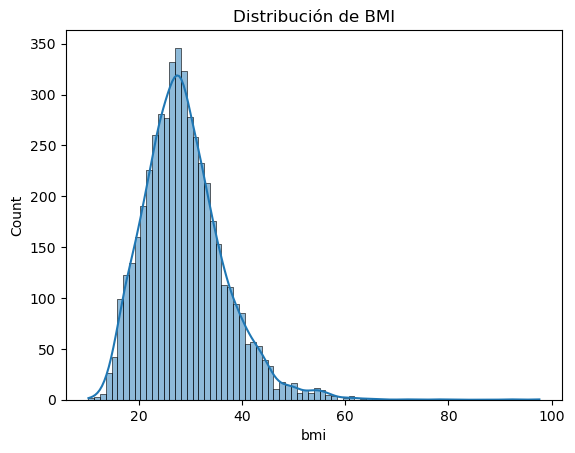

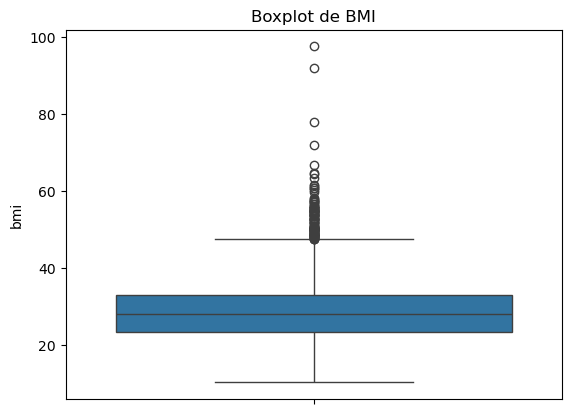

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['bmi'], kde=True)
plt.title("Distribución de BMI")
plt.show()

sns.boxplot(df['bmi'])
plt.title("Boxplot de BMI")
plt.show()

In [11]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [12]:
#Se elimina la columna ID ya que no aporta información
df = df.drop(columns=['id'])

In [13]:
# Separar columnas categóricas y numéricas
# En esta sección, separamos las columnas categóricas y numéricas.
# Las columnas 'heart_disease' e 'hypertension' no se consideran categóricas porque son booleanas.
categorical = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical = ['age', 'avg_glucose_level', 'bmi']

#value counts de las columnas seleccionada en la variable categorical
for col in categorical:
    print(df[col].value_counts())
    print()

categorical_sin_booleanas = ['work_type', 'Residence_type', 'smoking_status']

#Gender rename para female=0 y para male =1
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

#ever married para Yes = 1 y para No = 0   
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

# Aplicar one-hot encoding solo a las columnas categóricas
# Utilizamos one-hot encoding para convertir las variables categóricas en variables dummy.
# Esto es necesario para que los algoritmos de machine learning puedan procesar estas variables.
df = pd.get_dummies(df, columns=categorical_sin_booleanas, drop_first=True)



gender
Female    2994
Male      2115
Name: count, dtype: int64

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64



## División de Datos: Train-Test Split

En esta sección, dividiremos los datos en conjuntos de entrenamiento y prueba.

Primero, separamos las características (features) de la variable objetivo (target). La variable objetivo en este caso es `stroke`, que indica si el paciente ha tenido un accidente cerebrovascular.

A continuación, utilizamos la función `train_test_split` de `sklearn` para dividir los datos en conjuntos de entrenamiento y prueba. Usamos un 80% de los datos para el entrenamiento y un 20% para la prueba. Además, utilizamos el parámetro `stratify` para asegurar que la proporción de clases en los conjuntos de entrenamiento y prueba sea similar a la del dataset original.

In [14]:
# Mostrar las columnas del DataFrame
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [15]:
# Separar las características (features) de la variable objetivo (target)
# La variable objetivo es 'stroke'
features = df.drop(columns=["stroke"])
target = df["stroke"]

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos un 80% de los datos para el entrenamiento y un 20% para la prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

## Manejo del Desbalanceo de Clases: Oversampling

En esta sección, abordaremos el desbalanceo de clases en la variable objetivo `stroke`. El desbalanceo de clases puede afectar negativamente el rendimiento del modelo, ya que los modelos de Machine Learning tienden a estar sesgados hacia la clase mayoritaria.

Primero, mostramos el desbalanceo de clases en el conjunto de entrenamiento.



In [16]:

# Mostrar el desbalanceo de clases en el conjunto de entrenamiento
print(y_train.value_counts())

stroke
0    3888
1     199
Name: count, dtype: int64


Para manejar este desbalanceo, utilizamos la técnica de oversampling. Esta técnica consiste en aumentar el número de muestras de la clase minoritaria replicando aleatoriamente sus ejemplos hasta que ambas clases tengan el mismo número de muestras.

A continuación, realizamos el oversampling de la clase minoritaria.



In [17]:
# Agregar la columna 'stroke' a X_train para facilitar el oversampling
X_train["stroke"] = y_train

# Separar las clases mayoritaria y minoritaria
stroke1 = X_train[X_train["stroke"] == 1]
stroke0 = X_train[X_train["stroke"] == 0]

# Mostrar el tamaño de cada clase antes del oversampling
print("Clase 1 (stroke):", stroke1.shape)
print("Clase 0 (no stroke):", stroke0.shape)

# Realizar el oversampling de la clase minoritaria
from sklearn.utils import resample

stroke1_oversampling = resample(stroke1, 
                                replace=True, 
                                n_samples=len(stroke0), 
                                random_state=0)

# Combinar las clases mayoritaria y minoritaria después del oversampling
X_train = pd.concat([stroke1_oversampling, stroke0])

# Separar las características (features) de la variable objetivo (target) después del oversampling
y_train = X_train["stroke"]
X_train = X_train.drop(columns=["stroke"])

# Mostrar el tamaño de la clase minoritaria después del oversampling
print("Tamaño de la clase minoritaria después del oversampling:", y_train.value_counts())

Clase 1 (stroke): (199, 16)
Clase 0 (no stroke): (3888, 16)
Tamaño de la clase minoritaria después del oversampling: stroke
1    3888
0    3888
Name: count, dtype: int64


## Scaling

En esta sección, escalaremos las características utilizando `StandardScaler`. Esto es importante para los modelos de regresión logística, ya que asegura que todas las características contribuyan de manera similar al modelo.

El escalado transforma las características para que tengan una media de 0 y una desviación estándar de 1.

In [18]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test = scaler.transform(X_test)

## Guardar el Scaler

Para asegurar la reproducibilidad y facilitar el despliegue del modelo, guardaremos el escalador en un archivo `.pkl`. Esto nos permitirá reutilizar el mismo escalador para transformar nuevos datos de manera consistente.

In [19]:
import joblib

# Guardar el escalador en un archivo .pkl
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Entrenamiento y Evaluación del Modelo K-Nearest Neighbors (KNN)

En esta sección, entrenaremos un modelo K-Nearest Neighbors (KNN) para predecir la variable objetivo `stroke`.

KNN es sensible a los outliers, lo que puede afectar negativamente su rendimiento. Por esta razón, es importante escalar las características antes de entrenar el modelo.

A continuación, entrenamos el modelo KNN utilizando los datos escalados y evaluamos su rendimiento.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Definir la distribución de parámetros para la búsqueda de hiperparámetros
param_distributions = {
    'n_neighbors': randint(low=1, high=50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_knn_oversampling = RandomizedSearchCV(
    estimator=knn,                   # Tu modelo base
    param_distributions=param_distributions,
    n_iter=50,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento balanceados con oversampling
random_search_knn_oversampling.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros (RandomizedSearchCV):", random_search_knn_oversampling.best_params_)

# Entrenar el modelo KNN con los mejores parámetros
best_knn_oversampling = random_search_knn_oversampling.best_estimator_

# Realizar predicciones con el modelo entrenado en los datos de prueba
y_pred_knn_oversampling = best_knn_oversampling.predict(X_test)

# Calcular precisión y otros resultados
print("Accuracy:", accuracy_score(y_test, y_pred_knn_oversampling))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_oversampling))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_oversampling))



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros (RandomizedSearchCV): {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy: 0.9168297455968689

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.11      0.10      0.11        50

    accuracy                           0.92      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.91      0.92      0.91      1022


Confusion Matrix:
 [[932  40]
 [ 45   5]]


## Análisis de Resultados - K-Nearest Neighbors (KNN) con Oversampling

El modelo K-Nearest Neighbors (KNN) con oversampling obtuvo una precisión general de 91%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.11. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Entrenamiento y Evaluación del Modelo de Regresión Logística con Oversampling

En esta sección, entrenaremos y evaluaremos un modelo de Regresión Logística utilizando los datos balanceados con oversampling. También realizaremos una búsqueda de hiperparámetros utilizando `RandomizedSearchCV` para encontrar los mejores parámetros para nuestro modelo.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform

# Crear el modelo de Regresión Logística
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Definir la distribución de parámetros para la búsqueda de hiperparámetros
param_distributions = {
    'C': uniform(loc=0, scale=4),  # Regularización
    'penalty': ['l1', 'l2']        # Tipo de penalización
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_log_reg_oversampling = RandomizedSearchCV(
    estimator=log_reg,               # Tu modelo base
    param_distributions=param_distributions,
    n_iter=50,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento balanceados con oversampling
random_search_log_reg_oversampling.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros (RandomizedSearchCV):", random_search_log_reg_oversampling.best_params_)

# Entrenar el modelo de Regresión Logística con los mejores parámetros
best_log_reg_oversampling = random_search_log_reg_oversampling.best_estimator_

# Realizar predicciones con el modelo entrenado en los datos de prueba
y_pred_log_reg_oversampling = best_log_reg_oversampling.predict(X_test)

# Calcular precisión y otros resultados
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_oversampling))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg_oversampling))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg_oversampling))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros (RandomizedSearchCV): {'C': 0.0031150633640573133, 'penalty': 'l2'}
Accuracy: 0.7211350293542075

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83       972
           1       0.13      0.80      0.22        50

    accuracy                           0.72      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.72      0.80      1022


Confusion Matrix:
 [[697 275]
 [ 10  40]]


## Análisis de Resultados - Regresión Logística con Oversampling

El modelo de Regresión Logística con oversampling obtuvo una precisión general de 72.11%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.22. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Entrenamiento y Evaluación del Modelo Random Forest

En esta sección, entrenaremos un modelo Random Forest para predecir la variable objetivo `stroke`.

También realizaremos una búsqueda de hiperparámetros utilizando `RandomizedSearchCV` para encontrar los mejores parámetros para nuestro modelo.

A continuación, entrenamos el modelo Random Forest utilizando los datos escalados y evaluamos su rendimiento.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

# Inicializar el modelo Random Forest
rf = RandomForestClassifier()

# Definir la distribución de parámetros para la búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': randint(low=100, high=300),
    'max_depth': randint(low=10, high=30)
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_rf_oversampling = RandomizedSearchCV(
    estimator=rf,                    # Tu modelo base
    param_distributions=param_distributions,
    n_iter=50,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento
random_search_rf_oversampling.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", random_search_rf_oversampling.best_params_)

# Entrenar el modelo Random Forest con los mejores parámetros
best_rf = random_search_rf_oversampling.best_estimator_

# Predecir con el modelo entrenado en los datos de prueba escalados
y_pred_rf_oversampling = best_rf.predict(X_test)

# Calcular precisión y otros resultados
print("Accuracy:", accuracy_score(y_test, y_pred_rf_oversampling))
print(classification_report(y_test, y_pred_rf_oversampling))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'max_depth': 26, 'n_estimators': 158}
Accuracy: 0.9461839530332681
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.22      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.59      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022



## Análisis de Resultados - Random Forest con Oversampling

El modelo Random Forest con oversampling obtuvo una precisión general de 94.52%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.0. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Entrenamiento y Evaluación del Modelo XGBoost

En esta sección, entrenaremos un modelo XGBoost para predecir la variable objetivo `stroke`. XGBoost.

También realizaremos una búsqueda de hiperparámetros utilizando `RandomizedSearchCV` para encontrar los mejores parámetros para nuestro modelo.

A continuación, entrenamos el modelo XGBoost utilizando los datos escalados y evaluamos su rendimiento.

In [23]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Crear el clasificador XGBoost
xgb_reg = xgb.XGBClassifier()  # para tareas de clasificación binaria

# Definir la distribución de parámetros para la búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': randint(low=100, high=300),
    'max_depth': randint(low=10, high=30),
    'learning_rate': uniform(0.1, 0.2)
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_xgb_oversampling = RandomizedSearchCV(
    estimator=xgb_reg,               # Tu modelo base
    param_distributions=param_distributions,
    n_iter=50,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento
random_search_xgb_oversampling.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", random_search_xgb_oversampling.best_params_)

# Entrenar el modelo XGBoost con los mejores parámetros
best_xgb = random_search_xgb_oversampling.best_estimator_

# Realizar predicciones con el modelo entrenado en los datos de prueba escalados
y_pred_xgb_oversampling = best_xgb.predict(X_test)

# Calcular métricas de clasificación con el mejor modelo
print("Accuracy con mejores parámetros:", accuracy_score(y_test, y_pred_xgb_oversampling))
print("\nClassification Report con mejores parámetros:\n", classification_report(y_test, y_pred_xgb_oversampling))
print("\nConfusion Matrix con mejores parámetros:\n", confusion_matrix(y_test, y_pred_xgb_oversampling))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'learning_rate': 0.17327236865873835, 'max_depth': 24, 'n_estimators': 289}
Accuracy con mejores parámetros: 0.9266144814090019

Classification Report con mejores parámetros:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       972
           1       0.14      0.10      0.12        50

    accuracy                           0.93      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.91      0.93      0.92      1022


Confusion Matrix con mejores parámetros:
 [[942  30]
 [ 45   5]]


## Análisis de Resultados - XGBoost con Oversampling

El modelo XGBoost con oversampling obtuvo una precisión general de 92.66%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.12. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Entrenamiento y Evaluación del Modelo Decision Tree con Oversampling

En esta sección, entrenaremos y evaluaremos un modelo Decision Tree utilizando los datos balanceados con oversampling. También realizaremos una búsqueda de hiperparámetros utilizando `RandomizedSearchCV` para encontrar los mejores parámetros para nuestro modelo.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Crear el modelo Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Definir la distribución de parámetros para la búsqueda de hiperparámetros
param_distributions = {
    'max_depth': randint(low=1, high=30),
    'min_samples_split': randint(low=2, high=20),
    'min_samples_leaf': randint(low=1, high=20)
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_dt_oversampling = RandomizedSearchCV(
    estimator=dt,                    # Tu modelo base
    param_distributions=param_distributions,
    n_iter=20,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento balanceados con oversampling
random_search_dt_oversampling.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros (RandomizedSearchCV):", random_search_dt_oversampling.best_params_)

# Entrenar el modelo Decision Tree con los mejores parámetros
best_dt_oversampling = random_search_dt_oversampling.best_estimator_

# Realizar predicciones con el modelo entrenado en los datos de prueba
y_pred_dt_oversampling = best_dt_oversampling.predict(X_test)

# Calcular precisión y otros resultados
print("Accuracy:", accuracy_score(y_test, y_pred_dt_oversampling))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_oversampling))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_oversampling))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros (RandomizedSearchCV): {'max_depth': 23, 'min_samples_leaf': 3, 'min_samples_split': 6}
Accuracy: 0.9119373776908023

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.17      0.20      0.18        50

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.57      1022
weighted avg       0.92      0.91      0.92      1022


Confusion Matrix:
 [[922  50]
 [ 40  10]]


## Análisis de Resultados - Decision Tree con Oversampling

El modelo Decision Tree con oversampling obtuvo una precisión general de 91.19%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.18. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Conclusión de los 4 Modelos Utilizados con Oversampling y Scaling

Aunque los modelos mostraron un buen rendimiento general, su capacidad para predecir la clase minoritaria (Stroke) fue limitada. Esto se refleja en la baja precisión, recall y F1-score para la clase 1 (Stroke) en todos los modelos evaluados.

### Próximo Paso

Para mejorar el rendimiento en la clase minoritaria, se pueden considerar las siguientes estrategias:
- **Ajustar el umbral de decisión**: Modificar el umbral de probabilidad para clasificar una instancia como clase 1.
- **Técnicas de balanceo de clases**: Utilizar técnicas como SMOTE (Synthetic Minority Over-sampling Technique) para generar más ejemplos sintéticos de la clase minoritaria.

En resumen, aunque los modelos evaluados tienen un buen rendimiento general, es necesario abordar el desbalanceo de clases para mejorar la predicción de la clase minoritaria (Stroke). El próximo paso será aplicar SMOTE para mejorar el rendimiento en la clase minoritaria.

## Aplicación de SMOTE y Escalado

En esta sección, aplicaremos SMOTE (Synthetic Minority Over-sampling Technique) para balancear las clases en el conjunto de entrenamiento. SMOTE genera ejemplos sintéticos de la clase minoritaria para equilibrar la proporción de clases.

Después de aplicar SMOTE, escalaremos los datos utilizando `MinMaxScaler` para asegurar que todas las características estén en la misma escala.

A continuación, mostramos el código para aplicar SMOTE y escalar los datos.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Dividir los datos en conjuntos de entrenamiento y prueba
X_trainsmote, X_testsmote, y_trainsmote, y_testsmote = train_test_split(features, target, test_size=0.20, stratify=target, random_state=42)

# Agregar la columna 'stroke' a X_trainsmote para facilitar el oversampling
X_trainsmote["stroke"] = y_trainsmote

# Separar las clases mayoritaria y minoritaria
strokesm1 = X_trainsmote[X_trainsmote["stroke"] == 1]
strokesm2 = X_trainsmote[X_trainsmote["stroke"] == 0]

# Combinar las clases mayoritaria y minoritaria en un solo DataFrame
strokesm_combined = pd.concat([strokesm1, strokesm2])

# Separar características y objetivo
X = strokesm_combined.drop(columns=['stroke'])
y = strokesm_combined['stroke']

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Escalar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_testsmote)

# Asignar los datos escalados a las variables de entrenamiento y prueba
X_trainsmote = X_train_scaled
y_trainsmote = y_resampled
X_testsmote = X_test_scaled

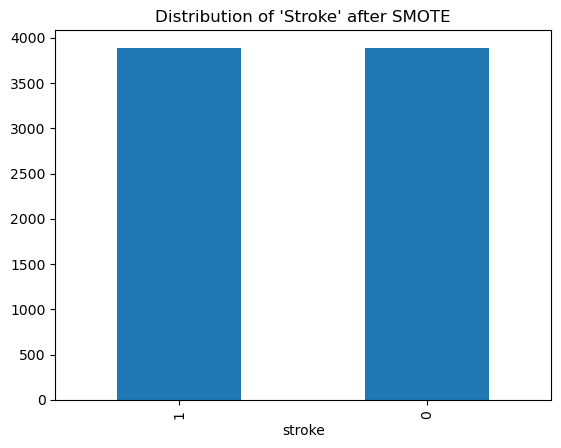

In [26]:
# Check the new distribution of the target variable
y_resampled.value_counts().plot(kind="bar")
plt.title("Distribution of 'Stroke' after SMOTE")
plt.show()



## Entrenamiento y Evaluación del Modelo K-Nearest Neighbors (KNN) con SMOTE

En esta sección, entrenaremos y evaluaremos un modelo K-Nearest Neighbors (KNN) utilizando los datos balanceados con SMOTE. También realizaremos una búsqueda de hiperparámetros utilizando `RandomizedSearchCV` para encontrar los mejores parámetros para nuestro modelo.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Definir la distribución de parámetros para la búsqueda de hiperparámetros
param_distributions = {
    'n_neighbors': randint(low=1, high=50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_knn_smote = RandomizedSearchCV(
    estimator=knn,                   # Tu modelo base
    param_distributions=param_distributions,
    n_iter=50,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento balanceados con SMOTE
random_search_knn_smote.fit(X_trainsmote, y_trainsmote)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros (RandomizedSearchCV):", random_search_knn_smote.best_params_)

# Entrenar el modelo KNN con los mejores parámetros
best_knn_smote = random_search_knn_smote.best_estimator_

# Realizar predicciones con el modelo entrenado en los datos de prueba
y_pred_knn_smote = best_knn_smote.predict(X_testsmote)

# Calcular precisión y otros resultados
print("Accuracy:", accuracy_score(y_testsmote, y_pred_knn_smote))
print("\nClassification Report:\n", classification_report(y_testsmote, y_pred_knn_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_testsmote, y_pred_knn_smote))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros (RandomizedSearchCV): {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy: 0.8864970645792564

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.11      0.18      0.13        50

    accuracy                           0.89      1022
   macro avg       0.53      0.55      0.54      1022
weighted avg       0.91      0.89      0.90      1022


Confusion Matrix:
 [[897  75]
 [ 41   9]]


## Análisis de Resultados - K-Nearest Neighbors (KNN) con SMOTE

El modelo K-Nearest Neighbors (KNN) con SMOTE obtuvo una precisión general de 88.64%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.13. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Entrenamiento y Evaluación del Modelo de Regresión Logística con SMOTE

En esta sección, entrenaremos y evaluaremos un modelo de Regresión Logística utilizando los datos balanceados con SMOTE. También realizaremos una búsqueda de hiperparámetros utilizando `RandomizedSearchCV` para encontrar los mejores parámetros para nuestro modelo.o de Regresión Logística utilizando los datos escalados y balanceados con SMOTE, y evaluamos su rendimiento.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform

# Crear el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Definir la distribución de parámetros para la búsqueda de hiperparámetros
param_distributions = {
    'C': uniform(loc=0, scale=4),  # Regularización
    'penalty': ['l2'],             # Tipo de penalización compatible con lbfgs
    'solver': ['lbfgs', 'liblinear']  # Solvers compatibles con l2
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_log_reg_smote = RandomizedSearchCV(
    estimator=log_reg,               # Tu modelo base
    param_distributions=param_distributions,
    n_iter=20,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento balanceados con SMOTE
random_search_log_reg_smote.fit(X_trainsmote, y_trainsmote)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros (RandomizedSearchCV):", random_search_log_reg_smote.best_params_)

# Entrenar el modelo de Regresión Logística con los mejores parámetros
best_log_reg_smote = random_search_log_reg_smote.best_estimator_

# Realizar predicciones con el modelo entrenado en los datos de prueba
y_pred_log_reg_smote = best_log_reg_smote.predict(X_testsmote)

# Calcular precisión y otros resultados
print("Accuracy:", accuracy_score(y_testsmote, y_pred_log_reg_smote))
print("\nClassification Report:\n", classification_report(y_testsmote, y_pred_log_reg_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_testsmote, y_pred_log_reg_smote))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros (RandomizedSearchCV): {'C': 1.8670515729919197, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8444227005870841

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.17      0.54      0.25        50

    accuracy                           0.84      1022
   macro avg       0.57      0.70      0.58      1022
weighted avg       0.93      0.84      0.88      1022


Confusion Matrix:
 [[836 136]
 [ 23  27]]


## Análisis de Resultados - Regresión Logística con SMOTE

El modelo de Regresión Logística con SMOTE obtuvo una precisión general de 84.44%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.25. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Entrenamiento y Evaluación del Modelo XGBoost

En esta sección, entrenaremos y evaluaremos un modelo XGBoost utilizando los datos escalados y balanceados con SMOTE. También realizaremos una búsqueda de hiperparámetros utilizando `GridSearchCV` y `RandomizedSearchCV` para encontrar los mejores parámetros para nuestro modelo.

In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Crear el clasificador XGBoost
xgb_cla = xgb.XGBClassifier()  


# Definir la distribución de parámetros para la búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': randint(low=100, high=300),
    'max_depth': randint(low=10, high=30),
    'learning_rate': uniform(0.1, 0.2),
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_xgb_smote = RandomizedSearchCV(
    estimator=xgb_cla,               # Tu modelo base
    param_distributions=param_distributions,
    n_iter=50,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento
random_search_xgb_smote.fit(X_trainsmote, y_trainsmote)
print("Mejores parámetros (RandomizedSearchCV):", random_search_xgb_smote.best_params_)

# Entrenar el modelo Random Forest con los mejores parámetros
best_xgb_smote = random_search_xgb_smote.best_estimator_

# Predecir con el modelo entrenado con los mejores parámetros
y_pred_xgb_smote = random_search_xgb_smote.predict(X_testsmote)

# Calcular precisión y otros resultados
print("Accuracy:", accuracy_score(y_testsmote, y_pred_xgb_smote))
print(classification_report(y_testsmote, y_pred_xgb_smote))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros (RandomizedSearchCV): {'learning_rate': 0.1898901348276407, 'max_depth': 10, 'n_estimators': 147}
Accuracy: 0.9207436399217221
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.17      0.16      0.16        50

    accuracy                           0.92      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.92      0.92      0.92      1022



## Análisis de Resultados - XGBoost con SMOTE

El modelo XGBoost con SMOTE obtuvo una precisión general de 92.07%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.16. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Entrenamiento y Evaluación del Modelo Random Forest con SMOTE

En esta sección, entrenaremos y evaluaremos un modelo Random Forest utilizando los datos escalados y balanceados con SMOTE. También realizaremos una búsqueda de hiperparámetros utilizando `GridSearchCV` y `RandomizedSearchCV` para encontrar los mejores parámetros para nuestro modelo.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, accuracy_score

# Crear el modelo Random Forest con parámetros iniciales
rf = RandomForestClassifier()

# Definir la distribución de parámetros para la búsqueda de hiperparámetros con RandomizedSearchCV
param_distribs = {
    'n_estimators': randint(low=100, high=300),
    'max_depth': randint(low=10, high=30)
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_rf_smote = RandomizedSearchCV(
    estimator=rf,                    # Tu modelo base
    param_distributions=param_distribs,
    n_iter=50,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento
random_search_rf_smote.fit(X_trainsmote, y_trainsmote)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros (RandomizedSearchCV):", random_search_rf_smote.best_params_)

# Entrenar el modelo Random Forest con los mejores parámetros
best_rf_smote = random_search_rf_smote.best_estimator_

# Predecir con el modelo entrenado en los datos de prueba escalados
y_pred_rf_smote = best_rf.predict(X_testsmote)

# Calcular precisión y otros resultados
print("Accuracy:", accuracy_score(y_testsmote, y_pred_rf_smote))
print(classification_report(y_testsmote, y_pred_rf_smote))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros (RandomizedSearchCV): {'max_depth': 29, 'n_estimators': 163}
Accuracy: 0.9412915851272016
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.19      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.57      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022



## Análisis de Resultados - Random Forest con SMOTE

El modelo Random Forest con SMOTE obtuvo una precisión general de 91.38%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.12. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Entrenamiento y Evaluación del Modelo Decision Tree con SMOTE

En esta sección, entrenaremos y evaluaremos un modelo Decision Tree utilizando los datos balanceados con SMOTE. También realizaremos una búsqueda de hiperparámetros utilizando `RandomizedSearchCV` para encontrar los mejores parámetros para nuestro modelo.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Crear el modelo Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Definir la distribución de parámetros para la búsqueda de hiperparámetros
param_distributions = {
    'max_depth': randint(low=1, high=30),
    'min_samples_split': randint(low=2, high=20),
    'min_samples_leaf': randint(low=1, high=20)
}

# Realizar la búsqueda de hiperparámetros con RandomizedSearchCV
random_search_dt_smote = RandomizedSearchCV(
    estimator=dt,                    # Tu modelo base
    param_distributions=param_distributions,
    n_iter=50,                       # Número de combinaciones a probar
    cv=5,                            # Número de folds en la validación cruzada
    scoring='f1',                    # Métrica a optimizar
    n_jobs=-1,                       # Usar todos los núcleos disponibles
    random_state=42,                 # Para reproducibilidad
    verbose=2                        # Para ver el progreso
)

# Ajustar el modelo con los datos de entrenamiento balanceados con SMOTE
random_search_dt_smote.fit(X_trainsmote, y_trainsmote)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros (RandomizedSearchCV):", random_search_dt_smote.best_params_)

# Entrenar el modelo Decision Tree con los mejores parámetros
best_dt_smote = random_search_dt_smote.best_estimator_

# Realizar predicciones con el modelo entrenado en los datos de prueba
y_pred_dt_smote = best_dt_smote.predict(X_testsmote)

# Calcular precisión y otros resultados
print("Accuracy:", accuracy_score(y_testsmote, y_pred_dt_smote))
print("\nClassification Report:\n", classification_report(y_testsmote, y_pred_dt_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_testsmote, y_pred_dt_smote))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros (RandomizedSearchCV): {'max_depth': 24, 'min_samples_leaf': 3, 'min_samples_split': 3}
Accuracy: 0.8776908023483366

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       972
           1       0.09      0.16      0.11        50

    accuracy                           0.88      1022
   macro avg       0.52      0.54      0.52      1022
weighted avg       0.91      0.88      0.89      1022


Confusion Matrix:
 [[889  83]
 [ 42   8]]


## Análisis de Resultados - Decision Tree con SMOTE

El modelo Decision Tree con SMOTE obtuvo una precisión general de 87.76%. Sin embargo, el rendimiento en la clase minoritaria (Stroke) fue bajo, con un F1-Score de 0.11. Esto indica que el modelo tiene dificultades para predecir correctamente la clase minoritaria, ya que el F1-Score es una métrica que considera tanto la precisión como el recall, y un valor bajo sugiere que el modelo no está equilibrando bien estas dos métricas para la clase minoritaria.

## Métricas de Rendimiento de Todos los Modelos

A continuación, se presentan las métricas de rendimiento (precisión, recall, F1-score) para cada uno de los modelos evaluados:


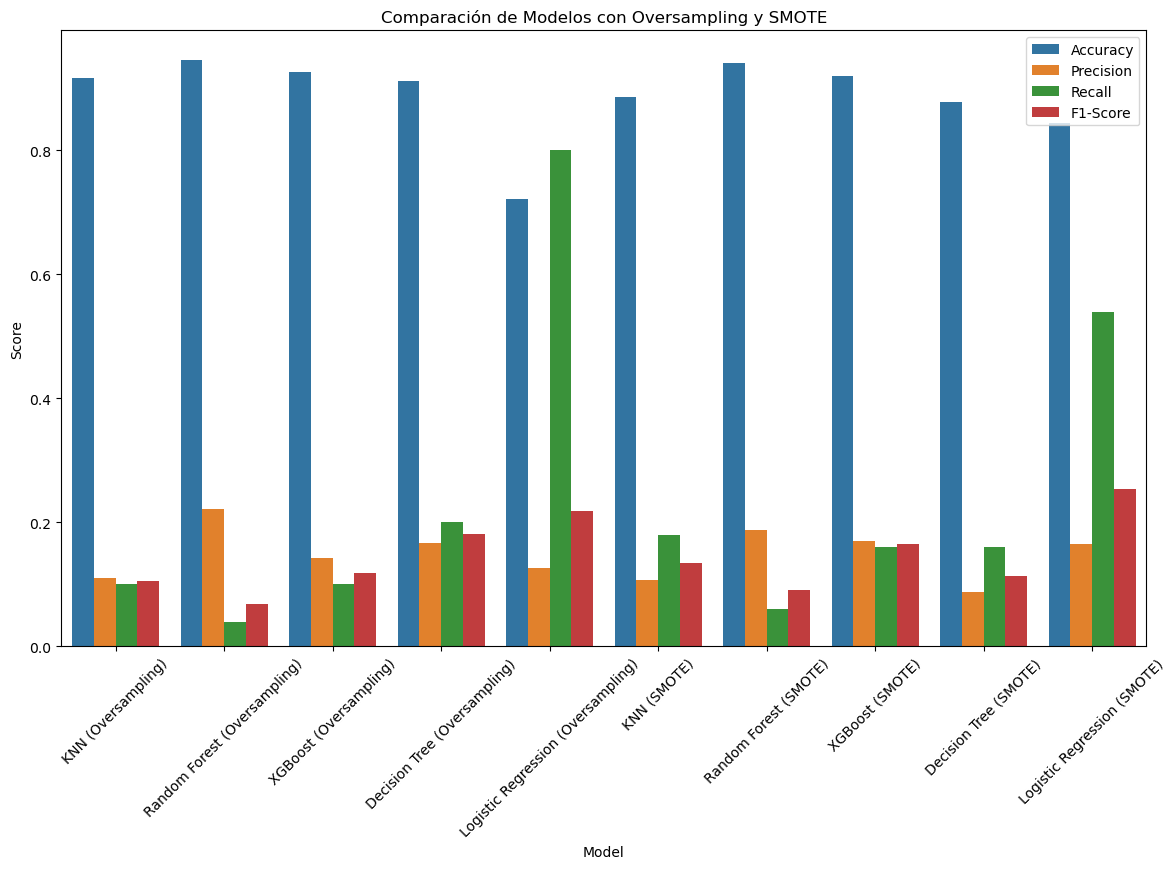

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Diccionario para almacenar los resultados de cada modelo
model_results = {}

# Almacenar los resultados de cada modelo con oversampling
model_results['KNN (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn_oversampling),
    'Precision': precision_score(y_test, y_pred_knn_oversampling),
    'Recall': recall_score(y_test, y_pred_knn_oversampling),
    'F1-Score': f1_score(y_test, y_pred_knn_oversampling)
}

model_results['Random Forest (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf_oversampling),
    'Precision': precision_score(y_test, y_pred_rf_oversampling),
    'Recall': recall_score(y_test, y_pred_rf_oversampling),
    'F1-Score': f1_score(y_test, y_pred_rf_oversampling)
}

model_results['XGBoost (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb_oversampling),
    'Precision': precision_score(y_test, y_pred_xgb_oversampling),
    'Recall': recall_score(y_test, y_pred_xgb_oversampling),
    'F1-Score': f1_score(y_test, y_pred_xgb_oversampling)
}

model_results['Decision Tree (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt_oversampling),
    'Precision': precision_score(y_test, y_pred_dt_oversampling),
    'Recall': recall_score(y_test, y_pred_dt_oversampling),
    'F1-Score': f1_score(y_test, y_pred_dt_oversampling),
}

model_results['Logistic Regression (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg_oversampling),
    'Precision': precision_score(y_test, y_pred_log_reg_oversampling),
    'Recall': recall_score(y_test, y_pred_log_reg_oversampling),
    'F1-Score': f1_score(y_test, y_pred_log_reg_oversampling)
}

# Almacenar los resultados de cada modelo con SMOTE
model_results['KNN (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_knn_smote),
    'Precision': precision_score(y_testsmote, y_pred_knn_smote),
    'Recall': recall_score(y_testsmote, y_pred_knn_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_knn_smote)
}

model_results['Random Forest (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_rf_smote),
    'Precision': precision_score(y_testsmote, y_pred_rf_smote),
    'Recall': recall_score(y_testsmote, y_pred_rf_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_rf_smote)
}

model_results['XGBoost (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_xgb_smote),
    'Precision': precision_score(y_testsmote, y_pred_xgb_smote),
    'Recall': recall_score(y_testsmote, y_pred_xgb_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_xgb_smote)
}

model_results['Decision Tree (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_dt_smote),
    'Precision': precision_score(y_testsmote, y_pred_dt_smote),
    'Recall': recall_score(y_testsmote, y_pred_dt_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_dt_smote)
}

model_results['Logistic Regression (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_log_reg_smote),
    'Precision': precision_score(y_testsmote, y_pred_log_reg_smote),
    'Recall': recall_score(y_testsmote, y_pred_log_reg_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_log_reg_smote)
}

# Convertir los resultados del diccionario a un DataFrame
results_df = pd.DataFrame(model_results).T.reset_index().rename(columns={'index': 'Model'})

# Transformar los datos para mejor visualización
results_long = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Score')

# Crear el gráfico comparativo
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_long)
plt.title('Comparación de Modelos con Oversampling y SMOTE')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Diccionario para almacenar los resultados de cada modelo
model_results = {}

# Almacenar los resultados de cada modelo con oversampling
model_results['KNN (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn_oversampling),
    'Precision': precision_score(y_test, y_pred_knn_oversampling),
    'Recall': recall_score(y_test, y_pred_knn_oversampling),
    'F1-Score': f1_score(y_test, y_pred_knn_oversampling)
}

model_results['Random Forest (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf_oversampling),
    'Precision': precision_score(y_test, y_pred_rf_oversampling),
    'Recall': recall_score(y_test, y_pred_rf_oversampling),
    'F1-Score': f1_score(y_test, y_pred_rf_oversampling)
}

model_results['XGBoost (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb_oversampling),
    'Precision': precision_score(y_test, y_pred_xgb_oversampling),
    'Recall': recall_score(y_test, y_pred_xgb_oversampling),
    'F1-Score': f1_score(y_test, y_pred_xgb_oversampling)
}

model_results['Decision Tree (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt_oversampling),
    'Precision': precision_score(y_test, y_pred_dt_oversampling),
    'Recall': recall_score(y_test, y_pred_dt_oversampling),
    'F1-Score': f1_score(y_test, y_pred_dt_oversampling),
}

model_results['Logistic Regression (Oversampling)'] = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg_oversampling),
    'Precision': precision_score(y_test, y_pred_log_reg_oversampling),
    'Recall': recall_score(y_test, y_pred_log_reg_oversampling),
    'F1-Score': f1_score(y_test, y_pred_log_reg_oversampling)
}

# Almacenar los resultados de cada modelo con SMOTE
model_results['KNN (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_knn_smote),
    'Precision': precision_score(y_testsmote, y_pred_knn_smote),
    'Recall': recall_score(y_testsmote, y_pred_knn_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_knn_smote)
}

model_results['Random Forest (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_rf_smote),
    'Precision': precision_score(y_testsmote, y_pred_rf_smote),
    'Recall': recall_score(y_testsmote, y_pred_rf_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_rf_smote)
}

model_results['XGBoost (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_xgb_smote),
    'Precision': precision_score(y_testsmote, y_pred_xgb_smote),
    'Recall': recall_score(y_testsmote, y_pred_xgb_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_xgb_smote)
}

model_results['Decision Tree (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_dt_smote),
    'Precision': precision_score(y_testsmote, y_pred_dt_smote),
    'Recall': recall_score(y_testsmote, y_pred_dt_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_dt_smote)
}

model_results['Logistic Regression (SMOTE)'] = {
    'Accuracy': accuracy_score(y_testsmote, y_pred_log_reg_smote),
    'Precision': precision_score(y_testsmote, y_pred_log_reg_smote),
    'Recall': recall_score(y_testsmote, y_pred_log_reg_smote),
    'F1-Score': f1_score(y_testsmote, y_pred_log_reg_smote)
}

# Convertir los resultados del diccionario a un DataFrame
results_df = pd.DataFrame(model_results).T.reset_index().rename(columns={'index': 'Model'})

# Mostrar el DataFrame
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN (Oversampling),0.916830,0.111111,0.10,0.105263
1,Random Forest (Oversampling),0.946184,0.222222,0.04,0.067797
2,XGBoost (Oversampling),0.926614,0.142857,0.10,0.117647
3,Decision Tree (Oversampling),0.911937,0.166667,0.20,0.181818
4,Logistic Regression (Oversampling),0.721135,0.126984,0.80,0.219178
5,KNN (SMOTE),0.886497,0.107143,0.18,0.134328
6,Random Forest (SMOTE),0.941292,0.187500,0.06,0.090909
7,XGBoost (SMOTE),0.920744,0.170213,0.16,0.164948
8,Decision Tree (SMOTE),0.877691,0.087912,0.16,0.113475
9,Logistic Regression (SMOTE),0.844423,0.165644,0.54,0.253521


## Conclusión Final


### Mejor Modelo

El modelo **Logistic Regression (SMOTE)** parece ser el mejor modelo en términos de balance entre precisión, recall y F1-Score. Aunque **Random Forest (SMOTE)** y **XGBoost (SMOTE)** tienen una mayor precisión general, **Logistic Regression (SMOTE)** ofrece un mejor recall y F1-Score, lo que lo hace más efectivo para identificar la clase minoritaria (Stroke).


### Próximos Pasos

Para mejorar el rendimiento en la clase minoritaria, se pueden considerar las siguientes estrategias:
- **Ajustar el umbral de decisión**: Modificar el umbral de probabilidad para clasificar una instancia como clase 1.
- **Modelos más avanzados**: Probar modelos más avanzados como redes neuronales profundas o ensamblajes de modelos.

En resumen, aunque los modelos evaluados tienen un buen rendimiento general, es necesario abordar el desbalanceo de clases para mejorar la predicción de la clase minoritaria (Stroke). Debido a esta falta de consistencia en la predicción de la clase minoritaria, no recomendamos continuar con este proyecto ni llevarlo a producción en su estado actual. Sin embargo, continuaremos trabajando en este proyecto con fines educativos, explorando nuevas técnicas y enfoques para mejorar el rendimiento de los modelos.

## Entrenamiento y Preparación del Modelo Final para Producción

En esta sección, seleccionaremos el mejor modelo basado en los resultados anteriores, entrenaremos el modelo con todos los datos disponibles y prepararemos el modelo para su despliegue en producción.

### Selección del Mejor Modelo

Basado en los resultados anteriores, seleccionamos el modelo **Logistic Regression (SMOTE)** como el mejor modelo debido a su balance entre precisión, recall y F1-Score.

### Entrenamiento del Modelo Final

Entrenaremos el modelo **Logistic Regression (SMOTE)** utilizando todos los datos disponibles y los mejores hiperparámetros encontrados durante la búsqueda de hiperparámetros.

In [45]:
X

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,False,True,False,False,True,True,False,False
1,0,61.0,0,0,1,202.21,28.1,False,False,True,False,False,False,True,False
2,1,80.0,0,1,1,105.92,32.5,False,True,False,False,False,False,True,False
3,0,49.0,0,0,1,171.23,34.4,False,True,False,False,True,False,False,True
4,0,79.0,1,0,1,174.12,24.0,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.75,28.1,False,True,False,False,True,False,True,False
5106,0,81.0,0,0,1,125.20,40.0,False,False,True,False,True,False,True,False
5107,0,35.0,0,0,1,82.99,30.6,False,False,True,False,False,False,True,False
5108,1,51.0,0,0,1,166.29,25.6,False,True,False,False,False,True,False,False


In [46]:
import joblib
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE



# Usar las variables preprocesadas directamente
X = df.drop(columns=["stroke"])  # Características preprocesadas
y = df["stroke"]    # Etiquetas preprocesadas

#Se hace el escalado y se guarda el pkl
# Escalar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Guardar escalado
joblib.dump(scaler, 'scalerfinal.pkl')

# Agregar la columna 'stroke' a X para facilitar el SMOTE
X["stroke"] = y

# Separar las clases mayoritaria y minoritaria
strokefinal1 = X[X["stroke"] == 1]
strokefinal2 = X[X["stroke"] == 0]

# Combinar las clases mayoritaria y minoritaria en un solo DataFrame
strokefinal_combined = pd.concat([strokefinal1, strokefinal2])

# Separar características y objetivo
X = strokefinal_combined.drop(columns=['stroke'])
y = strokefinal_combined['stroke']


# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

#GUARDAR SMOTE PKL
joblib.dump(smote, 'smotefinal.pkl')

# Crear el modelo Logistic Regression con los mejores hiperparámetros
best_params = {'C': 1.8670515729919197, 'penalty': 'l2', 'solver': 'lbfgs'} 
model = LogisticRegression(**best_params)

# Entrenar el modelo con todos los datos disponibles
model.fit(X_smote, y_smote)

# Guardar el modelo entrenado para su despliegue
joblib.dump(model, 'logistic_regression_smote_model.pkl')

c:\Users\est_c\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_smote_model.pkl']

### Preparación del Modelo para Despliegue

El modelo entrenado se ha guardado en un archivo `logistic_regression_smote_model.pkl` utilizando la biblioteca `joblib`. Este archivo puede ser cargado y utilizado para realizar predicciones en un entorno de producción.

### Código para Cargar y Utilizar el Modelo en Producción

A continuación se muestra un ejemplo de cómo cargar el modelo guardado y utilizarlo para realizar predicciones en nuevos datos.

In [39]:
import joblib
import pandas as pd

# Cargar el modelo guardado
model = joblib.load('random_forest_smote_model.pkl')

# Función para solicitar los datos del paciente
def get_patient_data():
    data = {}
    data['age'] = float(input("Ingrese la edad del paciente: "))
    data['hypertension'] = int(input("¿El paciente tiene hipertensión? (1 para Sí, 0 para No): "))
    data['heart_disease'] = int(input("¿El paciente tiene enfermedad cardíaca? (1 para Sí, 0 para No): "))
    data['avg_glucose_level'] = float(input("Ingrese el nivel promedio de glucosa del paciente: "))
    data['bmi'] = float(input("Ingrese el índice de masa corporal (BMI) del paciente: "))
    data['gender_Male'] = int(input("¿El paciente es masculino? (1 para Sí, 0 para No): "))
    data['ever_married_Yes'] = int(input("¿El paciente alguna vez se ha casado? (1 para Sí, 0 para No): "))
    data['work_type_Never_worked'] = int(input("¿El paciente nunca ha trabajado? (1 para Sí, 0 para No): "))
    data['work_type_Private'] = int(input("¿El paciente trabaja en el sector privado? (1 para Sí, 0 para No): "))
    data['work_type_Self-employed'] = int(input("¿El paciente es autónomo? (1 para Sí, 0 para No): "))
    data['work_type_children'] = int(input("¿El paciente es un niño? (1 para Sí, 0 para No): "))
    data['Residence_type_Urban'] = int(input("¿El paciente vive en una zona urbana? (1 para Sí, 0 para No): "))
    data['smoking_status_formerly smoked'] = int(input("¿El paciente fumaba anteriormente? (1 para Sí, 0 para No): "))
    data['smoking_status_never smoked'] = int(input("¿El paciente nunca ha fumado? (1 para Sí, 0 para No): "))
    data['smoking_status_smokes'] = int(input("¿El paciente fuma actualmente? (1 para Sí, 0 para No): "))
    
    return pd.DataFrame([data])

# Solicitar los datos del paciente
patient_data = get_patient_data()

# Realizar predicciones con el modelo cargado
prediction = model.predict(patient_data)

# Mostrar las predicciones
if prediction[0] == 1:
    print("El paciente tiene un riesgo de sufrir un accidente cerebrovascular.")
else:
    print("El paciente no tiene un riesgo significativo de sufrir un accidente cerebrovascular.")

ValueError: could not convert string to float: ''